In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pycountry

In [32]:
spotify = pd.read_csv('universal_top_spotify_songs.csv')

/var/folders/75/p026c7vj06qb1cwvpcnx3n1c0000gn/T/ipykernel_15022/2661004252.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(spotify.corr())


<Axes: >

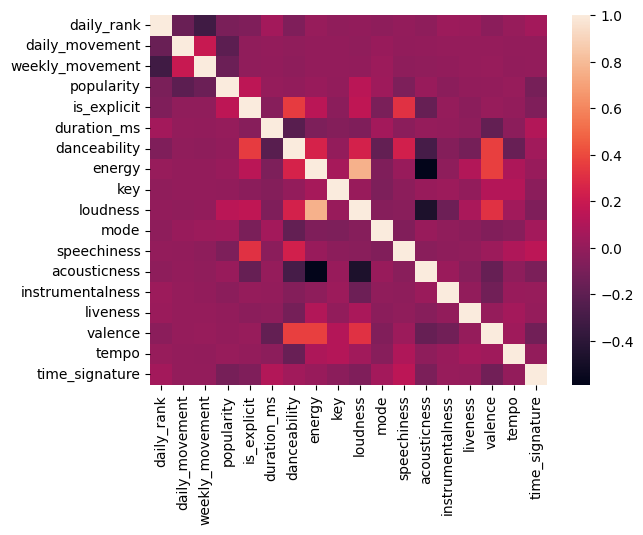

In [8]:
sns.heatmap(spotify.corr())

In [5]:
#spotify_id = unique id
#name = name of song
#artists = artist
#daily rank = top 50 list
#daily/weekly movement = change in ranking
#country = if null = global
#mode = major or minor key
#valence = musical positiveness
#tempo = bpm

# Data Cleaning

In [34]:
# dealing with null values in the country tab
countries = {country.alpha_2: country.name for country in pycountry.countries}

countries['Global'] = 'Global'

spotify['country'].fillna('Global', inplace = True)

# replacing country codes with full names
spotify['country'] = spotify['country'].replace(countries)

spotify['country'].unique()

array(['Global', 'South Africa', 'Viet Nam',
       'Venezuela, Bolivarian Republic of', 'Uruguay', 'United States',
       'Ukraine', 'Taiwan, Province of China', 'Turkey', 'Thailand',
       'El Salvador', 'Slovakia', 'Singapore', 'Sweden', 'Saudi Arabia',
       'Romania', 'Paraguay', 'Portugal', 'Poland', 'Pakistan',
       'Philippines', 'Peru', 'Panama', 'New Zealand', 'Norway',
       'Netherlands', 'Nicaragua', 'Nigeria', 'Malaysia', 'Mexico',
       'Morocco', 'Latvia', 'Luxembourg', 'Lithuania', 'Kazakhstan',
       'Korea, Republic of', 'Japan', 'Italy', 'Iceland', 'India',
       'Israel', 'Ireland', 'Indonesia', 'Hungary', 'Honduras',
       'Hong Kong', 'Guatemala', 'Greece', 'United Kingdom', 'France',
       'Finland', 'Spain', 'Egypt', 'Estonia', 'Ecuador',
       'Dominican Republic', 'Denmark', 'Germany', 'Czechia',
       'Costa Rica', 'Colombia', 'Chile', 'Switzerland', 'Canada',
       'Belarus', 'Brazil', 'Bolivia, Plurinational State of', 'Bulgaria',
       'Bel

In [35]:
spotify.dtypes

spotify_id             object
name                   object
artists                object
daily_rank              int64
daily_movement          int64
weekly_movement         int64
country                object
snapshot_date          object
popularity              int64
is_explicit              bool
duration_ms             int64
album_name             object
album_release_date     object
danceability          float64
energy                float64
key                     int64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
time_signature          int64
dtype: object

In [36]:
print(spotify.isnull().sum())

spotify_id             0
name                  21
artists               21
daily_rank             0
daily_movement         0
weekly_movement        0
country                0
snapshot_date          0
popularity             0
is_explicit            0
duration_ms            0
album_name            32
album_release_date    32
danceability           0
energy                 0
key                    0
loudness               0
mode                   0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
time_signature         0
dtype: int64


In [37]:
spotify = spotify.dropna(subset = ['name', 'artists', 'album_name', 'album_release_date'])

spotify.isnull().sum()

spotify_id            0
name                  0
artists               0
daily_rank            0
daily_movement        0
weekly_movement       0
country               0
snapshot_date         0
popularity            0
is_explicit           0
duration_ms           0
album_name            0
album_release_date    0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
dtype: int64